In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Progress bar
from tqdm import trange, tqdm

In [2]:
import webbpsf_ext
from webbpsf_ext import NIRCam_ext as NIRCam
from webbpsf_ext.imreg_tools import recenter_psf, crop_image

webbpsf_ext.setup_logging('WARN', verbose=False)

In [3]:
nrc = NIRCam(filter='F200W', pupil_mask='CIRCLYOT', image_mask='MASK335R', 
             fov_pix=128, oversample=4)

In [4]:
nrc.options['charge_diffusion_sigma'] = 0.0062
nrc.options['add_ipc'] = True

In [5]:
psf = nrc.calc_psf()

  Modified tilt from 2.1 to 1.6844000244140627 um: -52.303 nm wfe
  Modified tilt from 2.1 to 1.7359000244140625 um: -45.822 nm wfe
  Modified tilt from 2.1 to 1.7874000244140629 um: -39.341 nm wfe
  Modified tilt from 2.1 to 1.838900024414063 um: -32.859 nm wfe
  Modified tilt from 2.1 to 1.8904000244140629 um: -26.378 nm wfe
  Modified tilt from 2.1 to 1.9419000244140627 um: -19.897 nm wfe
  Modified tilt from 2.1 to 1.9934000244140626 um: -13.416 nm wfe
  Modified tilt from 2.1 to 2.044900024414063 um: -6.934 nm wfe
  Modified tilt from 2.1 to 2.096400024414063 um: -0.453 nm wfe
  Modified tilt from 2.1 to 2.1479000244140627 um: 6.028 nm wfe
  Modified tilt from 2.1 to 2.199400024414063 um: 12.509 nm wfe
  Modified tilt from 2.1 to 2.250900024414063 um: 18.991 nm wfe
  Modified tilt from 2.1 to 2.3024000244140628 um: 25.472 nm wfe


Text(0.5, 1.0, 'Old F200W PSF')

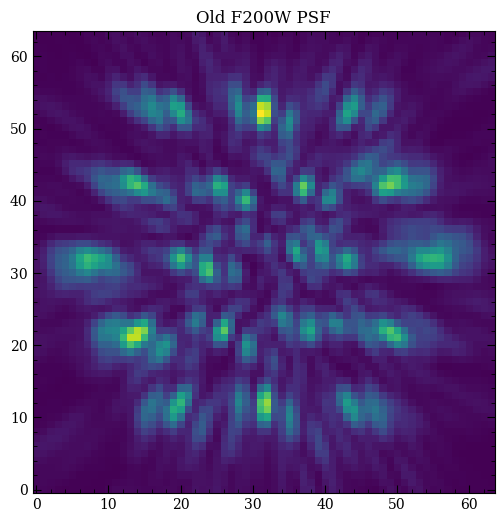

In [6]:
plt.imshow(crop_image(psf[3].data, 64))
plt.title('Old F200W PSF')

In [5]:
psf = nrc.calc_psf()

  Modified tilt from 2.1 to 1.6844000244140627 um: 673.430 nm wfe
  Modified tilt from 2.1 to 1.7359000244140625 um: 589.980 nm wfe
  Modified tilt from 2.1 to 1.7874000244140629 um: 506.530 nm wfe
  Modified tilt from 2.1 to 1.838900024414063 um: 423.081 nm wfe
  Modified tilt from 2.1 to 1.8904000244140629 um: 339.631 nm wfe
  Modified tilt from 2.1 to 1.9419000244140627 um: 256.182 nm wfe
  Modified tilt from 2.1 to 1.9934000244140626 um: 172.732 nm wfe
  Modified tilt from 2.1 to 2.044900024414063 um: 89.283 nm wfe
  Modified tilt from 2.1 to 2.096400024414063 um: 5.833 nm wfe
  Modified tilt from 2.1 to 2.1479000244140627 um: -77.616 nm wfe
  Modified tilt from 2.1 to 2.199400024414063 um: -161.066 nm wfe
  Modified tilt from 2.1 to 2.250900024414063 um: -244.515 nm wfe
  Modified tilt from 2.1 to 2.3024000244140628 um: -327.965 nm wfe


Text(0.5, 1.0, 'New F200W PSF')

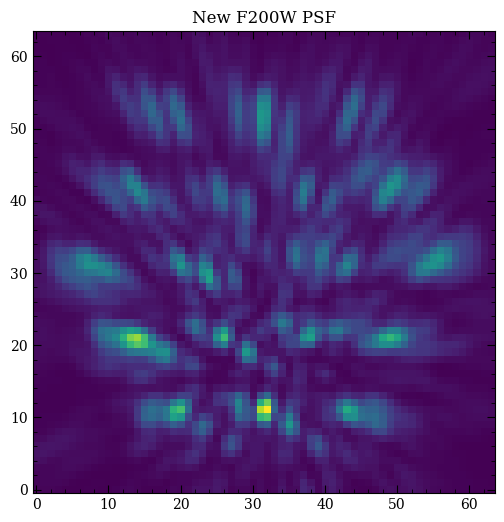

In [6]:
plt.imshow(crop_image(psf[3].data, 64))
plt.title('New F200W PSF')

In [7]:
# wave_arr = [2.5, 3.0, 3.35, 3.5, 4.0, 4.5, 5.0]
wave_arr = [1.5, 2.0, 2.1, 2.5]
psf_arr = []
for wave in tqdm(wave_arr):
    hdul = nrc.calc_psf(monochromatic=wave*1e-6)
    psf_arr.append(hdul[0].data)

psf_arr = np.array(psf_arr)

  0%|          | 0/4 [00:00<?, ?it/s]

  Modified tilt from 2.1 to 1.5 um: -972.228 nm wfe


 25%|██▌       | 1/4 [00:02<00:06,  2.21s/it]

  Modified tilt from 2.1 to 2.0 um: -162.038 nm wfe


 50%|█████     | 2/4 [00:04<00:04,  2.20s/it]

  Modified tilt from 2.1 to 2.0999999999999996 um: -0.000 nm wfe


 75%|███████▌  | 3/4 [00:06<00:02,  2.21s/it]

  Modified tilt from 2.1 to 2.5 um: 648.152 nm wfe


100%|██████████| 4/4 [00:08<00:00,  2.20s/it]


In [8]:
_, xyoff_over = recenter_psf(psf_arr, gfit=True)
xyoff_pix = xyoff_over / nrc.oversample

In [13]:
# xyoff_pix[1] - 
xyoff_pix 

array([[-0.02184535, -4.46932261],
       [-0.02177097, -1.16845446],
       [-0.02200517, -0.50742281],
       [-0.0142263 ,  2.13817766]])

In [14]:
yoff = -1*xyoff_pix[:,1]
ctilt_nm = np.array([-5500, -4000, -3000, -1500, -500, 1000, 2000.])

from webbpsf_ext.maths import jl_poly, jl_poly_fit
cf = jl_poly_fit(yoff, ctilt_nm)

In [15]:
cf

array([ 124.18730051, -245.51150102])

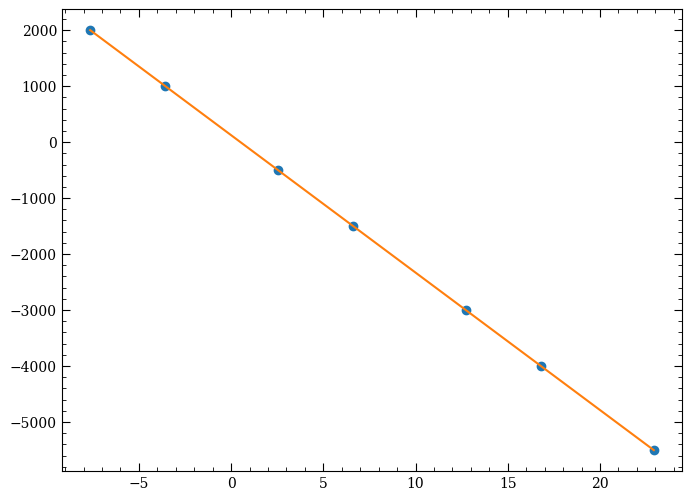

In [16]:
plt.plot(yoff, ctilt_nm, marker='o', ls='none')
plt.plot(yoff, jl_poly(yoff, cf))
# plt.plot(yoff, jl_poly(yoff, [0,-500]))

In [7]:
nrc.options['charge_diffusion_sigma'] = 0.02
nrc.options['add_ipc'] = True

In [5]:
psf = nrc.calc_psf()

  Modified tilt from 3.35 to 3.6631884309999996 um: -20.767 nm wfe
  Modified tilt from 3.35 to 3.765611740800041 um: -6.942 nm wfe
  Modified tilt from 3.35 to 3.868035050600083 um: 15.578 nm wfe
  Modified tilt from 3.35 to 3.9704583604001247 um: 45.923 nm wfe
  Modified tilt from 3.35 to 4.072881670200167 um: 83.223 nm wfe
  Modified tilt from 3.35 to 4.175304980000209 um: 126.607 nm wfe
  Modified tilt from 3.35 to 4.27772828980025 um: 175.205 nm wfe
  Modified tilt from 3.35 to 4.380151599600293 um: 228.148 nm wfe
  Modified tilt from 3.35 to 4.482574909400333 um: 284.565 nm wfe
  Modified tilt from 3.35 to 4.584998219200377 um: 343.587 nm wfe
  Modified tilt from 3.35 to 4.687421529000418 um: 404.342 nm wfe
  Modified tilt from 3.35 to 4.789844838800461 um: 465.962 nm wfe
  Modified tilt from 3.35 to 4.892268148600502 um: 527.576 nm wfe
  Modified tilt from 3.35 to 4.994691458400543 um: 588.314 nm wfe
  Modified tilt from 3.35 to 5.097114768200586 um: 647.306 nm wfe
  Modified ti

Text(0.5, 1.0, 'Old F444W PSF')

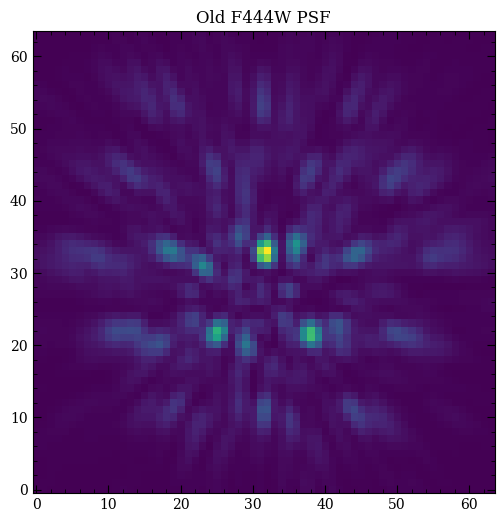

In [8]:
plt.imshow(crop_image(psf[1].data, 64))
plt.title('Old F444W PSF')

Text(0.5, 1.0, 'New F444W PSF')

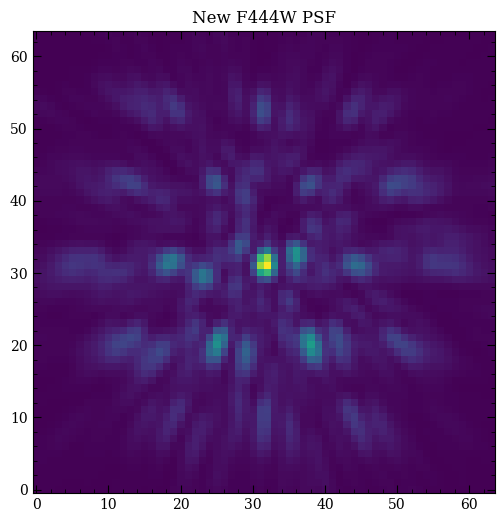

In [13]:
plt.imshow(crop_image(psf[3].data, 64))
plt.title('New F444W PSF')

In [7]:
old_f356w = np.array([
    -47.870,
    -16.740,
    -0.408,
    +2.227,
    -7.733,
    -29.187, 
    -61.033,
    -102.170,
    -151.497,
    -207.912,
    -270.313,
    -337.600,
])

new_f356w = np.array([
    168.335,
    100.025,
    47.634,
    10.148,
    -13.444,
    -24.155,
    -22.997,
    -10.982,
    10.876,
    41.566,
    80.075,
    125.391,
])

In [10]:
new_f356w / old_f356w

array([-3.51650303e+00, -5.97520908e+00, -1.16750000e+02,  4.55680287e+00,
        1.73852321e+00,  8.27594477e-01,  3.76796159e-01,  1.07487521e-01,
       -7.17902005e-02, -1.99921120e-01, -2.96230666e-01, -3.71418839e-01])

In [6]:
old_f356w * -0.4

array([ 19.148 ,   6.696 ,   0.1632,  -0.8908,   3.0932,  11.6748,
        24.4132,  40.868 ,  60.5988,  83.1648, 108.1252, 135.04  ])

In [14]:
old_f444w = np.array([
    -71.325, 
    -112.458,
    -160.773,
    -215.323,
    -275.161,
    -339.341,
    -406.916,
    -476.939,
    -548.465,
    -620.545,
    -692.235,
    -762.586,
    -830.654,
    -895.490,
    -956.149,
    -1011.683,
])

new_f444w = np.array([
    -20.767,
    -6.942,
    15.578,
    45.923,
    83.223,
    126.607,
    175.205,
    228.148,
    284.565,
    343.587,
    404.342,
    465.962,
    527.576,
    588.314,
    647.306,
    703.682,
])

In [15]:
new_f444w / old_f444w

array([ 0.29116018,  0.06172971, -0.09689438, -0.21327494, -0.30245202,
       -0.37309668, -0.43056798, -0.47835887, -0.51883894, -0.55368587,
       -0.58411089, -0.61102879, -0.63513328, -0.65697439, -0.67699281,
       -0.69555582])

In [4]:
wave_arr = [2.5, 3.0, 3.35, 3.5, 4.0, 4.5, 5.0]
psf_arr = []
for wave in tqdm(wave_arr):
    hdul = nrc.calc_psf(monochromatic=wave*1e-6)
    psf_arr.append(hdul[0].data)

psf_arr = np.array(psf_arr)

  0%|          | 0/7 [00:00<?, ?it/s]

  Modified tilt from 3.35 to 2.5 um: 403.770 nm wfe


 14%|█▍        | 1/7 [00:04<00:27,  4.64s/it]

  Modified tilt from 3.35 to 3.0 um: 43.488 nm wfe


 29%|██▊       | 2/7 [00:06<00:15,  3.19s/it]

  Modified tilt from 3.35 to 3.35 um: 0.000 nm wfe


 43%|████▎     | 3/7 [00:08<00:10,  2.65s/it]

  Modified tilt from 3.35 to 3.5 um: 22.966 nm wfe


 57%|█████▋    | 4/7 [00:11<00:07,  2.47s/it]

  Modified tilt from 3.35 to 4.0 um: 232.081 nm wfe


 71%|███████▏  | 5/7 [00:13<00:04,  2.32s/it]

  Modified tilt from 3.35 to 4.5 um: 560.714 nm wfe


 86%|████████▌ | 6/7 [00:15<00:02,  2.30s/it]

  Modified tilt from 3.35 to 5.0 um: 898.745 nm wfe


100%|██████████| 7/7 [00:17<00:00,  2.49s/it]


In [5]:
_, xyoff_over = recenter_psf(psf_arr, gfit=True)
xyoff_pix = xyoff_over / nrc.oversample

In [6]:
xyoff_pix[2] - xyoff_pix

array([[-3.54634201e-04, -8.07510281e-01],
       [-6.09749108e-04, -8.75016680e-02],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 4.15355893e-04, -4.56992151e-02],
       [-2.92797235e-03, -4.63960270e-01],
       [-4.08001138e-03, -1.12381889e+00],
       [-4.49133342e-03, -1.80643310e+00]])

In [ ]:
xyoff_pix[2] - xyoff_pix

array([[-3.54634191e-04, -1.40759979e+00],
       [-6.09749154e-04, -3.19529461e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 4.15360302e-04,  4.55048987e-02],
       [-2.92797304e-03, -1.12138520e-01],
       [-4.08000980e-03, -5.91780041e-01],
       [-4.49135819e-03, -1.19236249e+00]])

In [ ]:
array([[-8.05104583e-04, -8.06058695e-01],
       [ 4.85092912e-04, -8.62875196e-02],
       [ 0.00000000e+00,  0.00000000e+00],
       [-4.81223696e-04, -4.60788873e-02],
       [-2.55621221e-03, -4.63501144e-01],
       [-4.45492606e-03, -1.11693954e+00],
       [-5.74939209e-03, -1.78518203e+00]])

wave   old   new  expected
2.5   0.81 -1.41  -1.41
3.0   0.09 -0.32  -0.32
3.35  0.00  0.00   0.00
3.5   0.05  0.05   0.05
4.0   0.46 -0.11  -0.11
4.5   1.12 -0.59  -0.59
5.0   1.81 -1.19  -1.19

In [7]:
arr1 = np.array([
    0.81,
    0.09,
    0.00,
    0.05,
    0.46,
    1.12,
    1.81,
])

In [8]:
arr2 = np.array([
    -1.41,
    -0.32,
    0.00,
    0.05,
    -0.11,
    -0.59,
    -1.19,
])


In [10]:
arr2 / arr1

array([-1.74074074, -3.55555556,         nan,  1.        , -0.23913043,
       -0.52678571, -0.65745856])

In [12]:
xyoff_pix.shape

(7, 2)

In [15]:
yoff = -1*xyoff_pix[:,1]

In [21]:
ctilt_nm = np.array([-7127.714, -2934.941, 0 , 1257.832, 5450.605, 9643.378, 13836.151])

In [33]:
from webbpsf_ext.maths import jl_poly, jl_poly_fit
cf = jl_poly_fit(yoff, ctilt_nm)

In [34]:
cf

array([ 113.4834419 , -500.36466401])

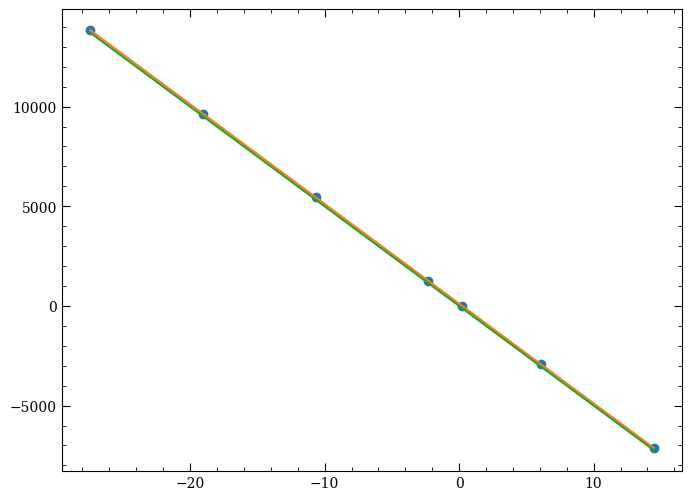

In [30]:
plt.plot(yoff, ctilt_nm, marker='o', ls='none')
plt.plot(yoff, jl_poly(yoff, cf))
plt.plot(yoff, jl_poly(yoff, [0,-500]))

In [24]:
cf

array([ 113.4834419 , -500.36466401])

In [ ]:
xyoff_pix

array([[-0.01677065, -0.22709695],
       [-0.01651564, -0.22721553],
       [-0.01712563, -0.22782356],
       [-0.01754089, -0.22801393],
       [-0.01901486, -0.22759644],
       [-0.01996837, -0.22438818],
       [-0.02028796, -0.21720259]])

In [14]:
xyoff_pix - xyoff_pix[2]

array([[-8.05104583e-04, -8.06058695e-01],
       [ 4.85092912e-04, -8.62875196e-02],
       [ 0.00000000e+00,  0.00000000e+00],
       [-4.81223696e-04, -4.60788873e-02],
       [-2.55621221e-03, -4.63501144e-01],
       [-4.45492606e-03, -1.11693954e+00],
       [-5.74939209e-03, -1.78518203e+00]])

In [ ]:
xyoff_over

array([-0.07999653, -9.31708454])

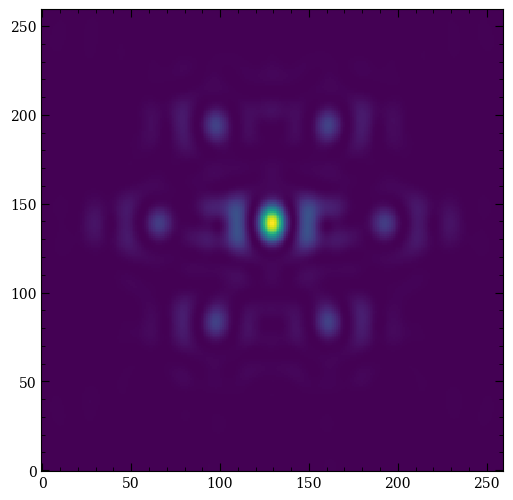

In [17]:
plt.imshow(hdul[0].data)